# SRA RNAseq Data
Date: 12-30-16 <br>
Author: John Vivian

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
df = pd.read_csv('SraRunInfo.csv')

/Users/Jvivian/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (30,31,32,33,38,39,40,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.columns

Index([u'Run', u'ReleaseDate', u'LoadDate', u'spots', u'bases',
       u'spots_with_mates', u'avgLength', u'size_MB', u'AssemblyName',
       u'download_path', u'Experiment', u'LibraryName', u'LibraryStrategy',
       u'LibrarySelection', u'LibrarySource', u'LibraryLayout', u'InsertSize',
       u'InsertDev', u'Platform', u'Model', u'SRAStudy', u'BioProject',
       u'Study_Pubmed_id', u'ProjectID', u'Sample', u'BioSample',
       u'SampleType', u'TaxID', u'ScientificName', u'SampleName',
       u'g1k_pop_code', u'source', u'g1k_analysis_group', u'Subject_ID',
       u'Sex', u'Disease', u'Tumor', u'Affection_Status', u'Analyte_Type',
       u'Histological_Type', u'Body_Site', u'CenterName', u'Submission',
       u'dbgap_study_accession', u'Consent', u'RunHash', u'ReadHash'],
      dtype='object')

In [7]:
df.size_MB.sum() * 1.0 / 1000 / 1000

177.15139499999998

In [6]:
print ', '.join(df.columns)

Run, ReleaseDate, LoadDate, spots, bases, spots_with_mates, avgLength, size_MB, AssemblyName, download_path, Experiment, LibraryName, LibraryStrategy, LibrarySelection, LibrarySource, LibraryLayout, InsertSize, InsertDev, Platform, Model, SRAStudy, BioProject, Study_Pubmed_id, ProjectID, Sample, BioSample, SampleType, TaxID, ScientificName, SampleName, g1k_pop_code, source, g1k_analysis_group, Subject_ID, Sex, Disease, Tumor, Affection_Status, Analyte_Type, Histological_Type, Body_Site, CenterName, Submission, dbgap_study_accession, Consent, RunHash, ReadHash


In [7]:
cols = ['Run', 'size_MB', 'BioProject', 'LibraryLayout', 'LibraryStrategy', 'Platform', 'Sex', 
    'Body_Site', 'Histological_Type', 'Tumor', 'Consent']

In [8]:
df = df[cols]

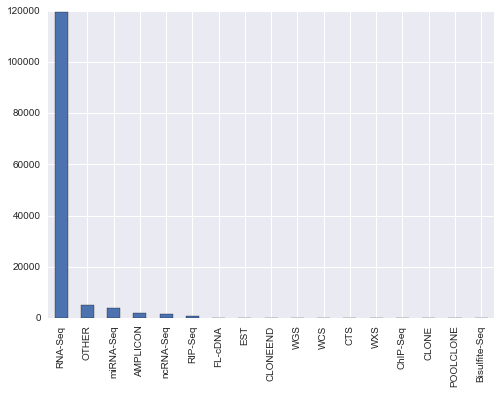

In [9]:
df['LibraryStrategy'].value_counts().plot(kind='bar');

Subset for just RNA-Seq data

In [10]:
rnaseq = df[df['LibraryStrategy'] == 'RNA-Seq']

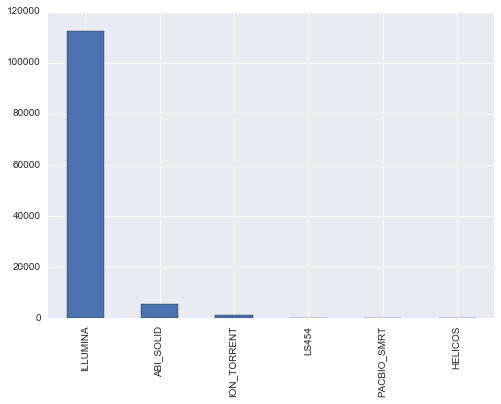

In [11]:
rnaseq['Platform'].value_counts().plot(kind='bar');

Subset for just Illumina data

In [12]:
rnaseq = rnaseq[rnaseq['Platform'] == 'ILLUMINA']

Subset for public consent

In [13]:
rnaseq = rnaseq[rnaseq.Consent == 'public']

## Stats

In [14]:
print 'Size of Dataset: {} Terabytes'.format(round(rnaseq['size_MB'].sum() * 1.0 / 1000 / 1000, 2))

Size of Dataset: 162.61 Terabytes


In [15]:
print 'Unique number of studies: ' + str(len(df['BioProject'].unique()))

Unique number of studies: 3805


In [16]:
print 'Number of samples: ' + str(len(rnaseq))

Number of samples: 112279


In [17]:
print 'Number of single-end samples: ' + str(rnaseq.LibraryLayout.value_counts().SINGLE)

Number of single-end samples: 56305


In [18]:
print 'Number of paired-end samples: ' + str(rnaseq.LibraryLayout.value_counts().PAIRED)

Number of paired-end samples: 55974


In [19]:
print 'Average Sample size: ' + str(rnaseq.size_MB.median()) + 'MB'

Average Sample size: 367.0MB


In [20]:
rnaseq[rnaseq['Run'] == 'SRR5119551'].size_MB

0    1238
Name: size_MB, dtype: int64

Make Manifest for run

In [21]:
with open('SRA-RNAseq-Manifest.tsv', 'w') as f:
    for i in xrange(len(rnaseq)):
        line = rnaseq.iloc[i]
        f.write('{}\t{}\t{}\n'.format(line.Run, line.BioProject, line.LibraryLayout))

In [22]:
len(rnaseq)

112279

In [23]:
rnaseq.head(1)

,Run,size_MB,BioProject,LibraryLayout,LibraryStrategy,Platform,Sex,Body_Site,Histological_Type,Tumor,Consent
0,SRR5119551,1238,PRJNA357964,SINGLE,RNA-Seq,ILLUMINA,not applicable,NaN,NaN,no,public


In [ ]:
rnaseq.size_MB.plot(kind='bar')